# Lab 4
### Contrast Enhancement

http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_hist



In [1]:
from commonfunctions import *
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [34]:
import skimage.io as io
import skimage
import matplotlib.pyplot as plt
import numpy as np

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

In [3]:
plt.style.use('dark_background')

(160, 137, 4)
(160, 137, 4)


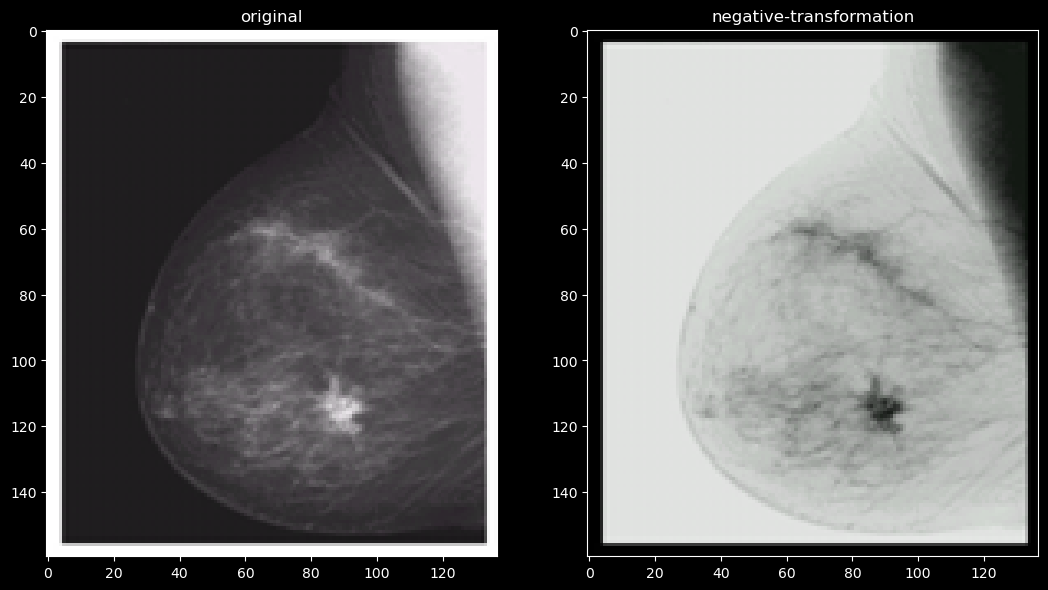

In [11]:
'''
1
Negative Transformation
'''
def convert_Negative(img, threshold=255):

    if img.shape[2] == 4:
        rgb_img = img[:, :, :3]  
        alpha_channel = img[:, :, 3] 
        negative_rgb = threshold - rgb_img      
        negative_img = np.dstack((negative_rgb, alpha_channel))
    else:
       
        negative_img = threshold - img
    return negative_img
original_img = io.imread('imgs/Picture1.png')  
print(original_img.shape)  
# print(original_img) 
negative_img=convert_Negative(original_img )
print(negative_img.shape) 
show_images([original_img,negative_img],['original','negative-transformation'])
 

uint8
(134, 135, 4)
(134, 135, 3)


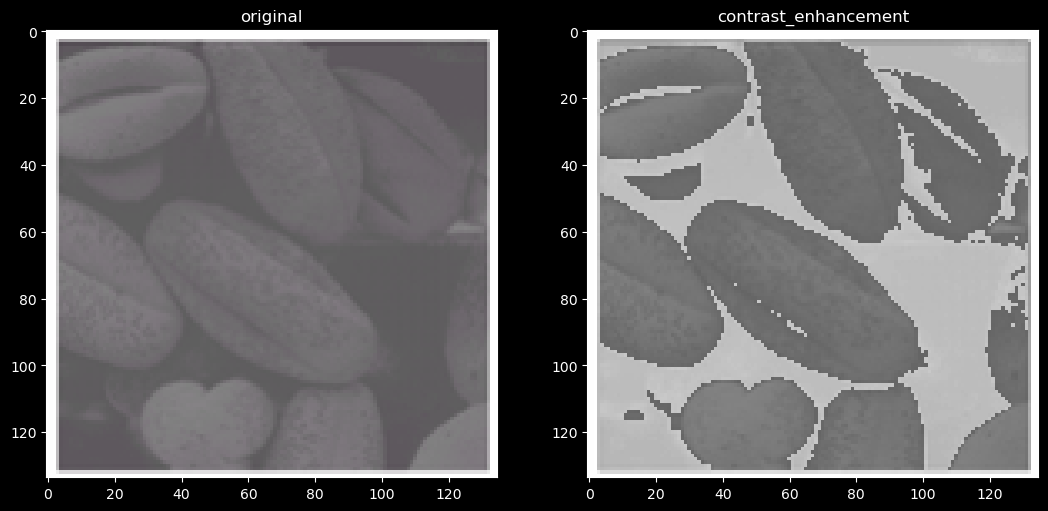

In [68]:
'''
2
Contrast Enhancement
'''
'''old (0,100)-->(50,200)
I new=(150/100)*I old +50'''
def contrast_enhancement(img, old_range=(0, 100), new_range=(50, 200)):
    old_min, old_max = old_range
    new_min, new_max = new_range
    
    # Convert the RGB image to grayscale
    gray_img = skimage.color.rgb2gray(img[:, :, :3])
    
    # Scale gray image to [0, 255]
    gray_img_scaled = (gray_img * 255).astype(np.uint8)

    # Calculate the scaling factor
    scale = (new_max - new_min) / (old_max - old_min)

    # Apply the contrast enhancement using np.where
    enhanced_gray = np.where(
        (gray_img_scaled >= old_min) & (gray_img_scaled <= old_max),
        new_min + (gray_img_scaled - old_min) * scale,  # New intensity
        gray_img_scaled  # Keep original intensity if outside range
    ).astype(np.uint8)  # Convert back to uint8

    # Convert the enhanced grayscale image back to RGB
    enhanced_rgb = skimage.color.gray2rgb(enhanced_gray)

    return enhanced_rgb

original_img = io.imread('imgs/Picture2.png') 
print(original_img.dtype)
print(original_img.shape)
enhanced_img=contrast_enhancement(original_img,(0,100),(50,200))  
print(enhanced_img.shape)
show_images([original_img,enhanced_img],['original','contrast_enhancement'])

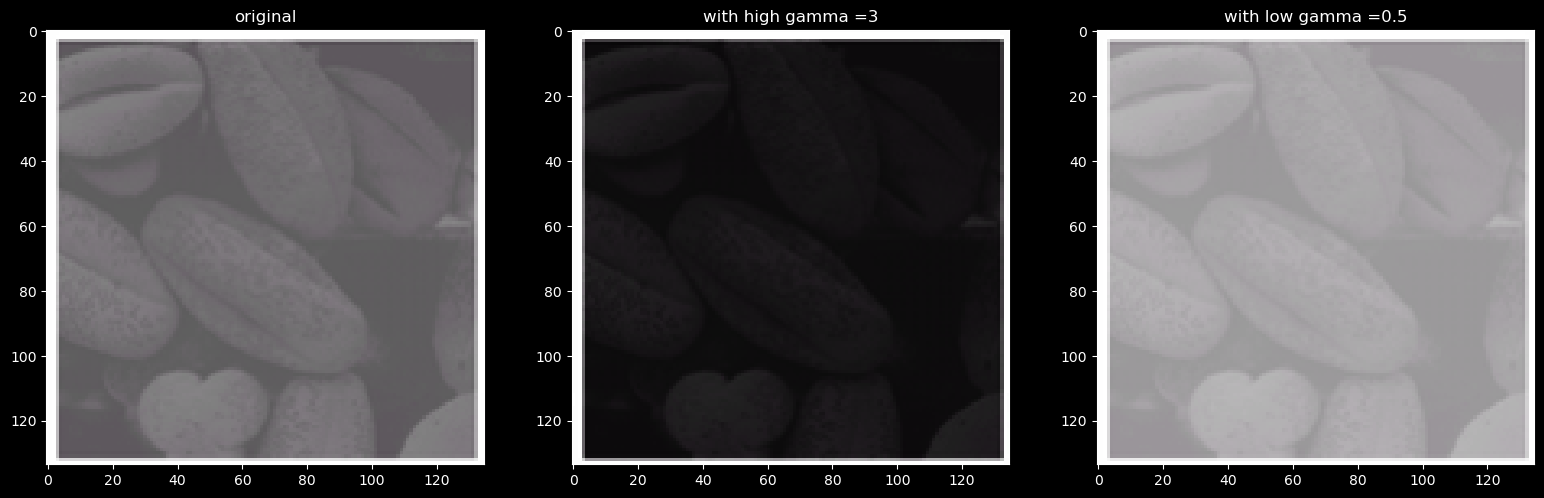

In [31]:
'''
3
Gamma Correction

'''
def gamma_correction(img, gamma=1.0, c=1.0):
 
    rgb_img = img[:, :, :3]  # RGB channels
    alpha_channel = img[:, :, 3]  # Alpha channel

 
    normalized_rgb_img = rgb_img / 255.0
    

    corrected_img = c * np.power(normalized_rgb_img, gamma)
    

    corrected_img = np.clip(corrected_img * 255, 0, 255).astype(np.uint8)

    
    enhanced_img = np.dstack((corrected_img, alpha_channel))  # This should have shape (height, width, 4)

    return enhanced_img


original_img = io.imread('imgs/Picture2.png')

fig1=gamma_correction(original_img, 3)
fig2=gamma_correction(original_img, 0.5)
show_images([original_img,fig1,fig2],['original','with high gamma =3','with low gamma =0.5'])



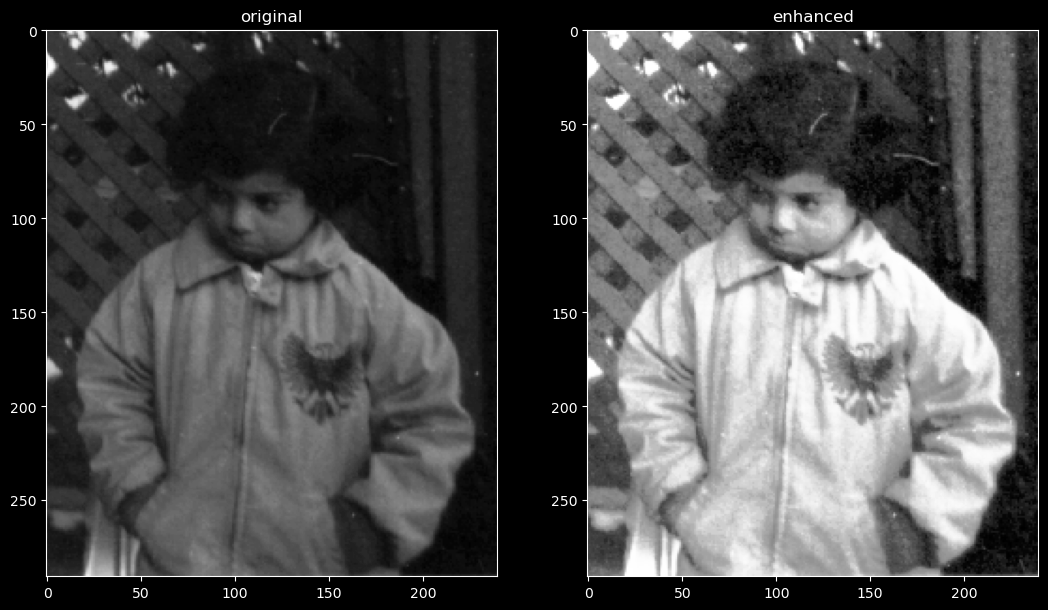

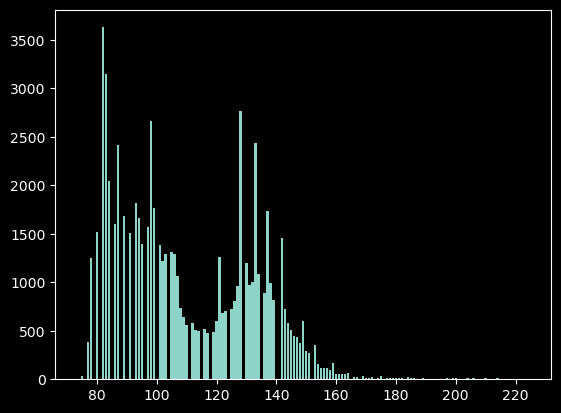

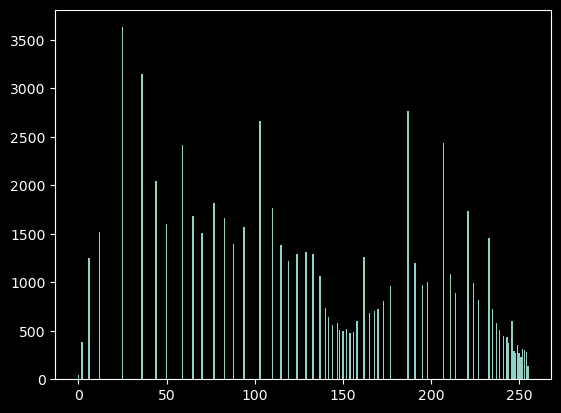

In [46]:
'''
4 Histogram Eq.
Note: Histogram function of skimage returns only present intensity values not all 255
You can use showHist function from commonfunctions file
'''

def getImageWithHist(name,ext,nbins=256):
    image_path = f'imgs/{name}.{ext}' 
    original_img = io.imread(image_path)
    # print(original_img[0])
    if original_img.ndim == 3:
        gray_img = color.rgb2gray(original_img) 
    else:
        gray_img = original_img


    G = 256  
    H = np.zeros(G, dtype=np.int32)
    
    for pixel_value in gray_img.ravel():
        H[pixel_value] += 1

    H_c = np.zeros(G, dtype=np.int32)
    H_c[0] = H[0]
    for p in range(1, G):
        H_c[p] = H_c[p - 1] + H[p]

    N, M = gray_img.shape
    T = np.round((G - 1) * H_c / (N * M)).astype(np.uint8)
    equalized_img = T[gray_img]
    return equalized_img
equalized_img=getImageWithHist('pout', 'tif') 
img=io.imread('imgs/pout.tif')
show_images([img,equalized_img],['original','enhanced'])
showHist(img)
showHist(equalized_img)


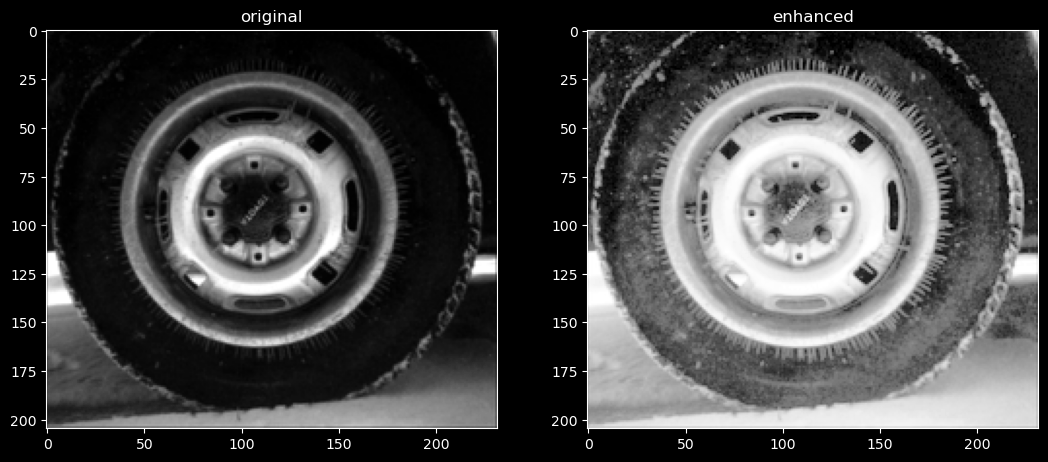

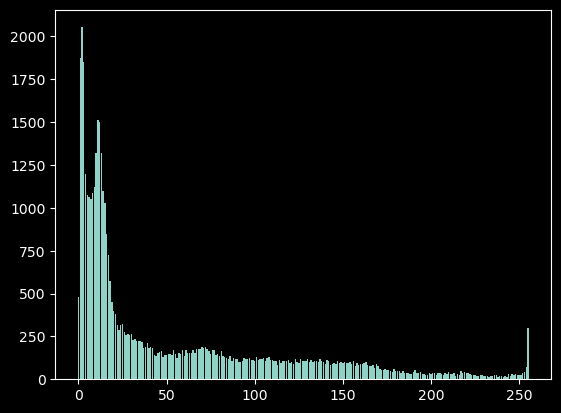

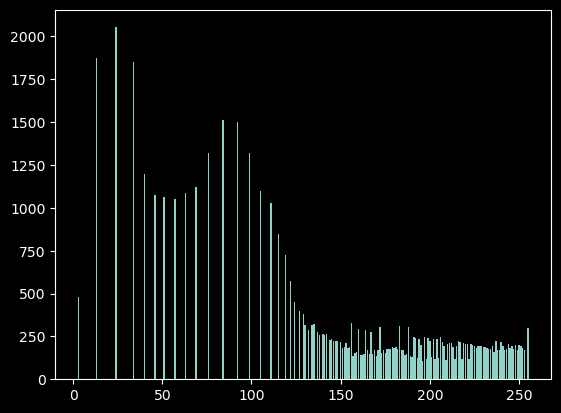

In [47]:
equalized_img=getImageWithHist('tire', 'tif') 
img=io.imread('imgs/tire.tif')
show_images([img,equalized_img],['original','enhanced'])
showHist(img)
showHist(equalized_img)